<a href="https://colab.research.google.com/github/shreya-rm/1stop/blob/main/Copy_of_1STOP(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1STOP FOUNDATION

**Project 2 - Recognition Of Objects with Convolutional Neural Network**

*Name : Shreya Myaleshi*



**Importing the required**

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

**Loading and splitting the data**

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Training Images :{}'.format(X_train.shape))
print('Testing Images :{}'.format(X_test.shape))

Training Images :(50000, 32, 32, 3)
Testing Images :(10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


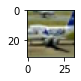

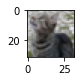

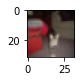

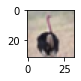

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

**Preprocessing the data**

In [ ]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding :", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:", Y_train.shape)


Shape before one-hot encoding : (50000, 1)
Shape after one-hot encoding: (50000, 10)


**Building the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))




Epoch 1/10
391/391 [==============================] - 568s 1s/step - loss: 1.5862 - accuracy: 0.4143 - val_loss: 1.1589 - val_accuracy: 0.5963
Epoch 2/10
391/391 [==============================] - 554s 1s/step - loss: 1.1145 - accuracy: 0.6044 - val_loss: 0.9666 - val_accuracy: 0.6614
Epoch 3/10
391/391 [==============================] - 550s 1s/step - loss: 0.9462 - accuracy: 0.6687 - val_loss: 0.8671 - val_accuracy: 0.6947
Epoch 4/10
391/391 [==============================] - 554s 1s/step - loss: 0.8340 - accuracy: 0.7090 - val_loss: 0.7587 - val_accuracy: 0.7377
Epoch 5/10
391/391 [==============================] - 549s 1s/step - loss: 0.7436 - accuracy: 0.7406 - val_loss: 0.7374 - val_accuracy: 0.7435
Epoch 6/10
391/391 [==============================] - 548s 1s/step - loss: 0.6812 - accuracy: 0.7626 - val_loss: 0.6854 - val_accuracy: 0.7608
Epoch 7/10
391/391 [==============================] - 548s 1s/step - loss: 0.6202 - accuracy: 0.7834 - val_loss: 0.6823 - val_accuracy: 0.7661

**Predicting**

In [ ]:
classes = range(0,10)

names = ['airplane',
              'automobile',
              'bird',
              'cat',
              'deer',
              'dog',
              'frog',
              'horse',
              'ship',
              'truck']

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

#generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 128ms/step


In [ ]:
print(predictions)

[[1.09866564e-03 7.96261666e-05 2.91933417e-02 4.75507490e-02
  6.00273728e-01 7.38657787e-02 4.00333060e-03 2.43221074e-01
  2.97649676e-04 4.16110619e-04]
 [8.75000667e-04 1.25793580e-04 4.42305245e-02 9.11299586e-02
  1.10043161e-01 1.33330509e-01 2.11645905e-02 5.97394466e-01
  3.23630346e-04 1.38238340e-03]
 [2.04919081e-04 4.48699684e-05 1.35976598e-02 2.68011522e-02
  1.26811952e-04 5.21139242e-02 9.04112279e-01 4.60856478e-04
  2.47625774e-03 6.12068034e-05]
 [5.04255295e-05 8.21412395e-05 1.22420327e-03 1.50108680e-01
  5.24424575e-03 3.32343839e-02 8.09338868e-01 2.08356432e-04
  2.15255102e-04 2.93344172e-04]
 [3.32916528e-07 9.99615431e-01 1.39064021e-11 2.34260111e-11
  4.57222584e-13 3.98909258e-13 2.62949523e-11 1.21138364e-12
  7.71784107e-06 3.76488577e-04]
 [3.50322953e-05 9.98309493e-01 2.09136886e-07 7.06936092e-08
  4.67742622e-10 2.74516454e-09 9.66842251e-08 1.47802692e-09
  3.52597970e-04 1.30242587e-03]
 [2.79741079e-01 7.74322019e-04 9.42686647e-02 5.56937531e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0
0.99999994
0.9999999
0.99999994
1.0
1.0
0.9999998
0.99999994


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 7 6 6 1 1 6 6 8]


**Final object detection**

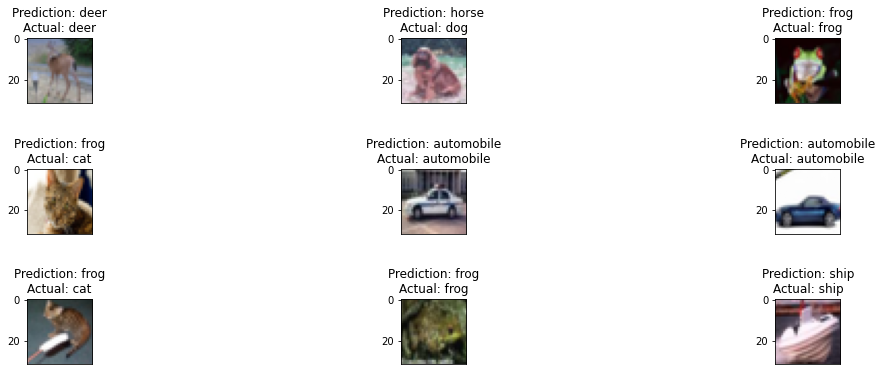

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(True)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()